<div align='center'>
    <h1>Tugas Besar Dasar Kecerdasan Artificial</h1>
    <h3>Implementasi Fuzzy System untuk Mengukur Kenyamanan Berdasarkan Suhu dan Kelembaban</h3>
</div>

**Anggota Kelompok** <br>
Muhammad Andhika M.     (103012300016)<br>
I Made Dwi Wiryawan R.  (103012300142)<br> 
M Reyenno R.S.                        (103012300326)<br>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h5>Membaca dan Menampilkan file CSV</h5>

In [149]:
df = pd.read_csv("cleanDataNew.csv")
fuzzy_df = df[["ta", "rh"]] # ta untuk suhu dan rh untuk kelembaban
fuzzy_df.head()

,ta,rh
0,23.0,59.0
1,24.1,32.0
2,24.1,34.0
3,23.6,44.0
4,23.4,25.0


<h5>Mengecek Apakah ada Nilai yang Kosong</h5>

In [150]:
if fuzzy_df['ta'].isnull().any():
    print("Ada nilai kosong di kolom 'Temperature'.")
else:
    print("Tidak ada nilai kosong di kolom 'Temperature'.")

if fuzzy_df['rh'].isnull().any():
    print("Ada nilai kosong di kolom 'Kelembaban'.")
else:
    print("Tidak ada nilai kosong di kolom 'Kelembaban'.")

Tidak ada nilai kosong di kolom 'Temperature'.
Tidak ada nilai kosong di kolom 'Kelembaban'.


<h5>Cek Apakah Ada Outlier</h5>

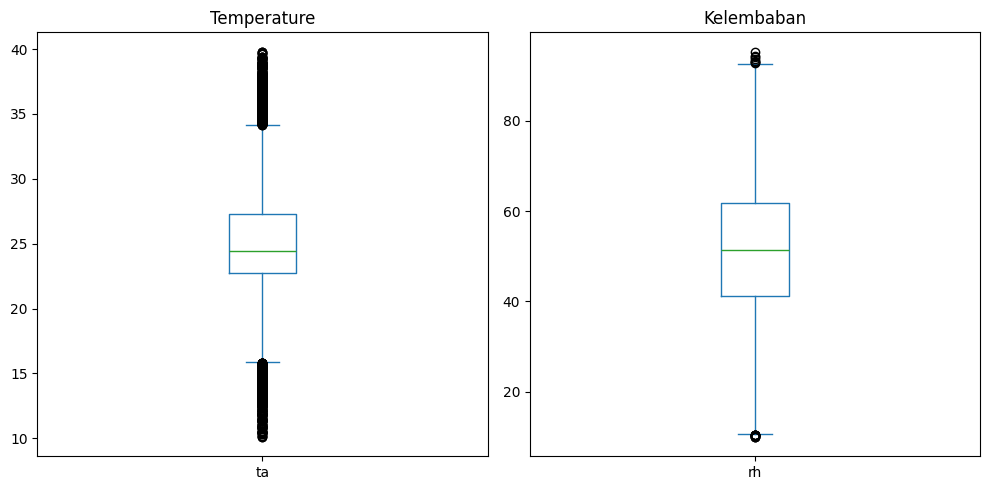

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fuzzy_df['ta'].plot.box(ax=axes[0])
axes[0].set_title('Temperature')

fuzzy_df['rh'].plot.box(ax=axes[1])
axes[1].set_title('Kelembaban')

plt.tight_layout()
plt.show()

<h5>Menghapus Nilai Outlier</h5>

In [152]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [153]:
remove = remove_outliers(fuzzy_df, ['ta', 'rh'])
fuzzy_df = remove.copy()

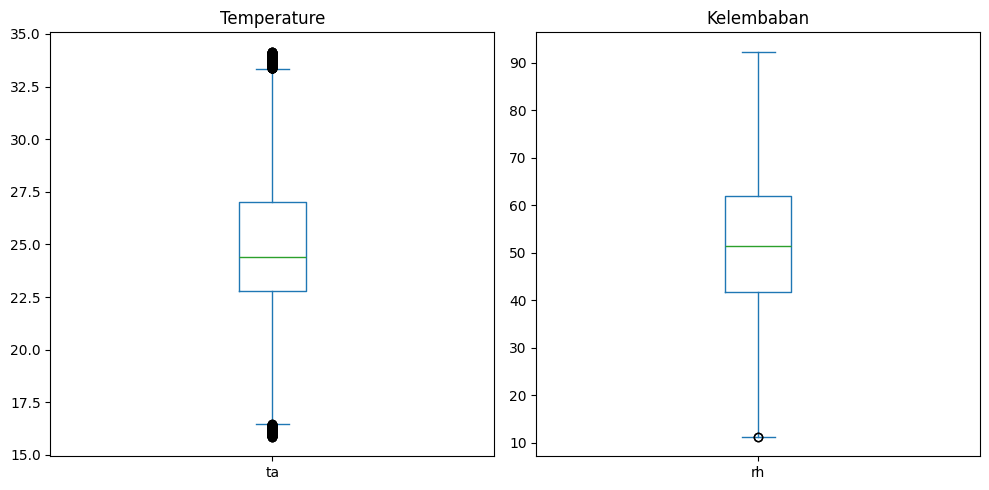

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fuzzy_df['ta'].plot.box(ax=axes[0])
axes[0].set_title('Temperature')

fuzzy_df['rh'].plot.box(ax=axes[1])
axes[1].set_title('Kelembaban')

plt.tight_layout()
plt.show()

<h5>Sampling Data</h5>

In [155]:
sample_data = fuzzy_df.sample(n=100, random_state=42).reset_index(drop=True)

<h5>Fungsi Keanggotaan Suhu</h5>

In [156]:
def fuzz_ta_dingin(x):
    if x <= 10:
        return 1
    elif 10 < x <= 20:
        return (20 - x) / 10
    else:
        return 0
        
def fuzz_ta_sedang(x):
    if 15 < x < 20:
        return (x - 15) / 5      
    elif 20 <= x <= 25:
        return 1               
    elif 25 < x <= 30:
        return (30 - x) / 5     
    else:
        return 0

def fuzz_ta_panas(x):
    if x >= 35:
        return 1
    elif 28 <= x < 35:
        return (x - 28) / 7
    else:
        return 0

<h5>Fungsi Keanggotaan Kelembaban</h5>

In [157]:
def fuzz_rh_kering(x):
    if x <= 20:
        return 1
    elif 20 < x <= 40:
        return (40 - x) / 20
    else:
        return 0

def fuzz_rh_normal(x):
    if 35 < x < 45:
        return (x - 35) / 10
    elif 45 <= x <= 55:
        return 1
    elif 55 < x <= 65:
        return (65 - x) / 10
    else:
        return 0

def fuzz_rh_lembab(x):
    if x >= 80:
        return 1
    elif 55 <= x < 80:
        return (x - 55) / 25
    else:
        return 0

<h5>Contoh Penerapan Pada Satu Data</h5>

In [158]:
example = sample_data.iloc[0]
ta_val, rh_val = 21, 36
print(f"Data Uji: Suhu={ta_val}, Kelembaban={rh_val}")
print("Keanggotaan Suhu:",
      f"dingin={fuzz_ta_dingin(ta_val)}",
      f"sedang={fuzz_ta_sedang(ta_val)}",
      f"panas={fuzz_ta_panas(ta_val)}")
print("Keanggotaan Kelembaban:",
      f"kering={fuzz_rh_kering(rh_val)}",
      f"normal={fuzz_rh_normal(rh_val)}",
      f"lembab={fuzz_rh_lembab(rh_val)}")

Data Uji: Suhu=21, Kelembaban=36
Keanggotaan Suhu: dingin=0 sedang=1 panas=0
Keanggotaan Kelembaban: kering=0.2 normal=0.1 lembab=0


<h5>Visualisasi Fungsi Keanggotaan</h5>

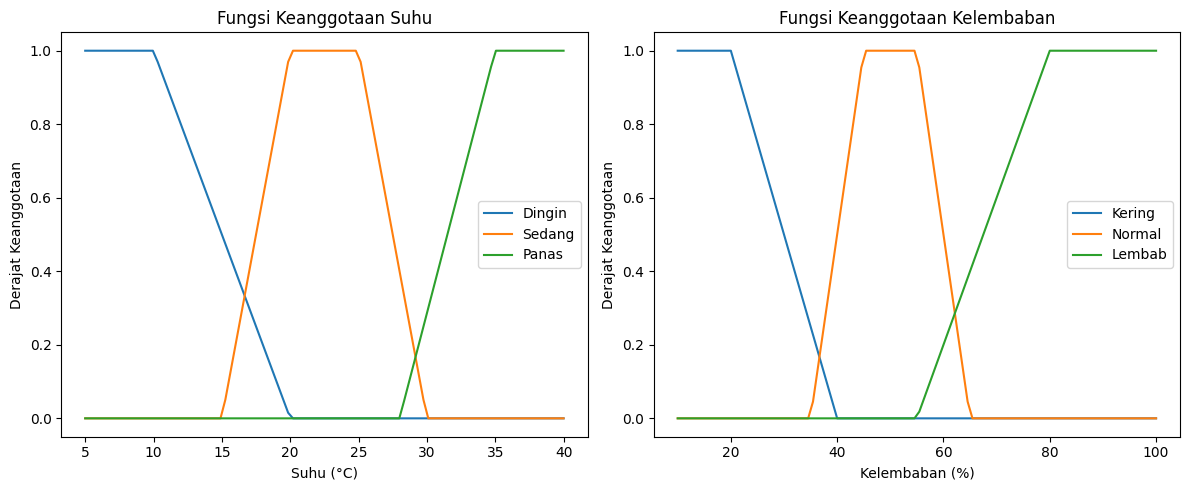

In [159]:
x_ta = np.linspace(5, 40, 100)
x_rh = np.linspace(10, 100, 100)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_ta, [fuzz_ta_dingin(x) for x in x_ta], label='Dingin')
plt.plot(x_ta, [fuzz_ta_sedang(x) for x in x_ta], label='Sedang')
plt.plot(x_ta, [fuzz_ta_panas(x) for x in x_ta], label='Panas')
plt.title('Fungsi Keanggotaan Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_rh, [fuzz_rh_kering(x) for x in x_rh], label='Kering')
plt.plot(x_rh, [fuzz_rh_normal(x) for x in x_rh], label='Normal')
plt.plot(x_rh, [fuzz_rh_lembab(x) for x in x_rh], label='Lembab')
plt.title('Fungsi Keanggotaan Kelembaban')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.tight_layout()
plt.show()

<h5>Fuzzy Rule</h5>

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

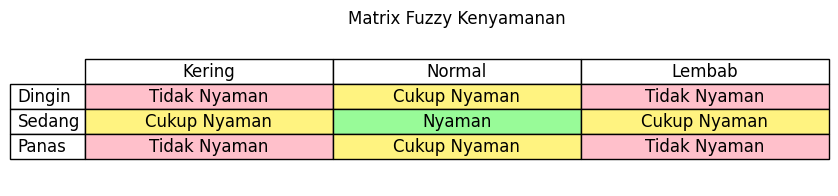

In [161]:
fuzzy_rule = {
    ("Dingin", "Kering"): "Tidak Nyaman",
    ("Dingin", "Normal"): "Cukup Nyaman",
    ("Dingin", "Lembab"): "Tidak Nyaman",
    ("Sedang", "Kering"): "Cukup Nyaman",
    ("Sedang", "Normal"): "Nyaman",
    ("Sedang", "Lembab"): "Cukup Nyaman",
    ("Panas", "Kering"): "Tidak Nyaman",
    ("Panas", "Normal"): "Cukup Nyaman",
    ("Panas", "Lembab"): "Tidak Nyaman"
}

suhu_levels = ['Dingin', 'Sedang', 'Panas']
kelembapan_levels = ['Kering', 'Normal', 'Lembab']

# Buat DataFrame untuk visualisasi
data = []
for suhu in suhu_levels:
    row = []
    for kelembapan in kelembapan_levels:
        row.append(fuzzy_rule[(suhu, kelembapan)])
    data.append(row)

df = pd.DataFrame(data, index=suhu_levels, columns=kelembapan_levels)

color_map = {
        "Nyaman": "#98FB98",
        "Cukup Nyaman": "#FFF380", 
        "Tidak Nyaman": "pink"   
    }

fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
table = ax.table(cellText=df.values,
                    rowLabels=df.index,
                    colLabels=df.columns,
                    cellLoc='center',
                    loc='center',
                )

ax.set_title("Matrix Fuzzy Kenyamanan")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Terapkan warna ke setiap sel
for (i, j), val in np.ndenumerate(df.values):
    color = color_map.get(val, 'white')
    table[(i+1, j)].set_facecolor(color)

<h5>Mamdani</h5>

In [162]:
def trapezoid(x, a, b, c, d):
    if x <= a:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x < d:
        return (d - x) / (d - c)
    else:
        return 0

In [163]:
def fuzzy_nyaman(x):
    return trapezoid(x, 70, 80, 100, 100)

def fuzzy_cukup_nyaman(x):
    return trapezoid(x, 30, 40, 60, 70)

def fuzzy_tidak_nyaman(x):
    return trapezoid(x, 0, 0, 20, 30)

def fuzzy_output_membership():
    return {
        "Tidak Nyaman": lambda x: np.clip(np.where(x <= 50, (50 - x) / 50, 0), 0, 1),
        "Cukup Nyaman": lambda x: np.clip(np.where((30 < x) & (x < 50), (x - 30) / 20,
                                                   np.where((50 <= x) & (x < 70), (70 - x) / 20, 0)), 0, 1),
        "Nyaman": lambda x: np.clip(np.where(x >= 50, (x - 50) / 50, 0), 0, 1)
    }

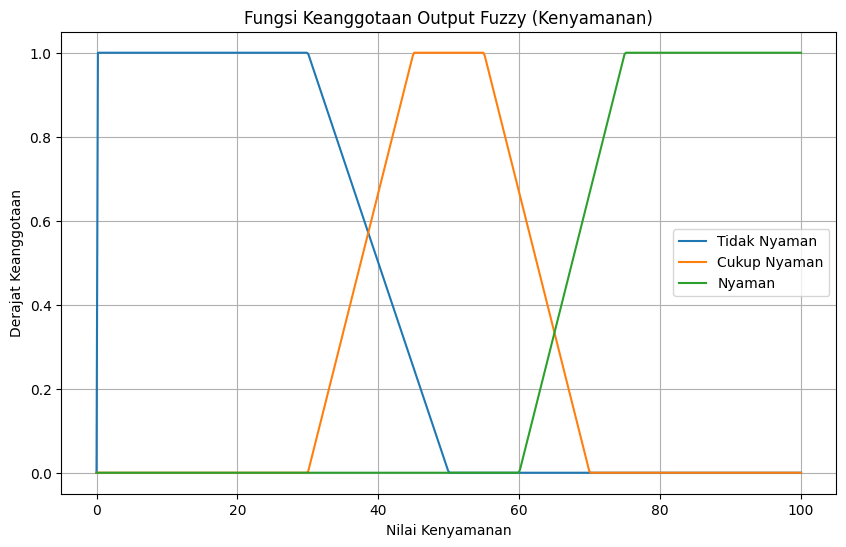

In [164]:
x_vals = np.linspace(0, 100, 500)
def tidak_nyaman(x):
    return trapezoid(x, 0, 0, 30, 50)

def cukup_nyaman(x):
    return trapezoid(x, 30, 45, 55, 70)

def nyaman(x):
    return trapezoid(x, 60, 75, 100, 100)
y_tidak = [tidak_nyaman(x) for x in x_vals]
y_cukup = [cukup_nyaman(x) for x in x_vals]
y_nyaman = [nyaman(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_tidak, label="Tidak Nyaman")
plt.plot(x_vals, y_cukup, label="Cukup Nyaman")
plt.plot(x_vals, y_nyaman, label="Nyaman")
plt.title("Fungsi Keanggotaan Output Fuzzy (Kenyamanan)")
plt.xlabel("Nilai Kenyamanan")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()
plt.show()

In [165]:
def mamdani_fuzzy_system(ta, rh):
    suhu = {
        "Dingin": fuzz_ta_dingin(ta),
        "Sedang": fuzz_ta_sedang(ta),
        "Panas": fuzz_ta_panas(ta)
    }

    kelembaban = {
        "Kering": fuzz_rh_kering(rh),
        "Normal": fuzz_rh_normal(rh),
        "Lembab": fuzz_rh_lembab(rh)
    }

    x = np.linspace(0, 100, 1001)
    output_membership = fuzzy_output_membership()
    aggregated = np.zeros_like(x)

    for s in suhu:
        for k in kelembaban:
            alpha = min(suhu[s], kelembaban[k])
            if alpha > 0:
                label = fuzzy_rule[(s, k)]
                aggregated = np.fmax(aggregated, np.fmin(alpha, output_membership[label](x)))

    if np.sum(aggregated) == 0:
        return 0
    return np.sum(x * aggregated) / np.sum(aggregated)

In [166]:
# Hitung untuk seluruh data dan simpan ke kolom baru
total = []
for i, row in fuzzy_df.iterrows():
    suhu = row['ta']
    lembab = row['rh']
    nilai = mamdani_fuzzy_system(suhu, lembab)
    total.append(round(nilai, 2))

# Tambahkan hasil ke dataframe
fuzzy_df['mamdani'] = total

fuzzy_df[['ta', 'rh', 'mamdani']].head(10)

,ta,rh,mamdani
0,23.0,59.0,75.84
1,24.1,32.0,50.00
2,24.1,34.0,50.00
3,23.6,44.0,83.21
4,23.4,25.0,50.00
5,25.1,39.0,77.25
6,24.0,42.0,82.21
7,25.6,28.0,50.00
8,21.1,39.0,77.25
9,21.3,36.0,60.40


<h5>Sugeno</h5>

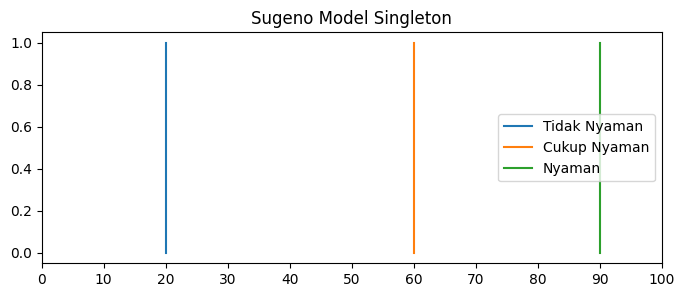

In [167]:
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model Singleton")

plt.plot([20, 20], [0, 1], label="Tidak Nyaman")
plt.plot([60, 60], [0, 1], label="Cukup Nyaman")
plt.plot([90, 90], [0, 1], label="Nyaman")
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

In [168]:
output_value = {
    "Tidak Nyaman": 20,
    "Cukup Nyaman": 60,
    "Nyaman": 90
}

def sugeno_label_inferensi(ta, rh):
    μ_ta = {
        "Dingin": fuzz_ta_dingin(ta),
        "Sedang": fuzz_ta_sedang(ta),
        "Panas": fuzz_ta_panas(ta)
    }

    μ_rh = {
        "Kering": fuzz_rh_kering(rh),
        "Normal": fuzz_rh_normal(rh),
        "Lembab": fuzz_rh_lembab(rh)
    }

    rules = []
    for ta_label, μ_t in μ_ta.items():
        for rh_label, μ_r in μ_rh.items():
            rule_label = fuzzy_rule.get((ta_label, rh_label))
            if rule_label is not None:
                α = min(μ_t, μ_r)
                z = output_value[rule_label]
                rules.append((α, z))

    numerator = sum([α * z for α, z in rules])
    denominator = sum([α for α, _ in rules])
    return numerator / denominator if denominator != 0 else 0

In [169]:
# Hitung untuk seluruh data dan simpan ke kolom baru
hasil = []
for i, row in fuzzy_df.iterrows():
    suhu = row['ta']
    lembab = row['rh']
    nilai = sugeno_label_inferensi(suhu, lembab)
    hasil.append(round(nilai, 2))

# Tambahkan hasil ke dataframe
fuzzy_df['sugeno'] = hasil

# Tampilkan hasil awal
fuzzy_df[['ta', 'rh', 'sugeno']].head(10)

,ta,rh,sugeno
0,23.0,59.0,83.68
1,24.1,32.0,60.00
2,24.1,34.0,60.00
3,23.6,44.0,90.00
4,23.4,25.0,60.00
5,25.1,39.0,86.67
6,24.0,42.0,90.00
7,25.6,28.0,60.00
8,21.1,39.0,86.67
9,21.3,36.0,70.00


In [170]:
fuzzy_df[['ta', 'rh', 'mamdani', 'sugeno']].head(10)

,ta,rh,mamdani,sugeno
0,23.0,59.0,75.84,83.68
1,24.1,32.0,50.00,60.00
2,24.1,34.0,50.00,60.00
3,23.6,44.0,83.21,90.00
4,23.4,25.0,50.00,60.00
5,25.1,39.0,77.25,86.67
6,24.0,42.0,82.21,90.00
7,25.6,28.0,50.00,60.00
8,21.1,39.0,77.25,86.67
9,21.3,36.0,60.40,70.00


<h5>Analisis</h5>

In [171]:
def label_manual(ta, rh):
    if 22 <= ta <= 27 and 40 <= rh <= 60:
        return 'Nyaman'
    elif 20 <= ta <= 30 and 30 <= rh <= 70:
        return 'Cukup Nyaman'
    else:
        return 'Tidak Nyaman'
        
def nilai_ke_label(nilai):
    if nilai < 40:
        return 'Tidak Nyaman'
    elif nilai < 75:
        return 'Cukup Nyaman'
    else:
        return 'Nyaman'


In [172]:
fuzzy_df['ground_truth'] = fuzzy_df.apply(lambda row: label_manual(row['ta'], row['rh']), axis=1)
fuzzy_df['pred_mamdani'] = fuzzy_df['mamdani'].apply(nilai_ke_label)
fuzzy_df['pred_sugeno'] = fuzzy_df['sugeno'].apply(nilai_ke_label)

In [173]:
from sklearn.metrics import classification_report

print("Evaluasi Mamdani:")
print(classification_report(fuzzy_df['ground_truth'], fuzzy_df['pred_mamdani']))

print("Evaluasi Sugeno:")
print(classification_report(fuzzy_df['ground_truth'], fuzzy_df['pred_sugeno']))


Evaluasi Mamdani:
              precision    recall  f1-score   support

Cukup Nyaman       0.58      0.74      0.65     13387
      Nyaman       0.77      0.97      0.86     11772
Tidak Nyaman       0.90      0.31      0.46     10409

    accuracy                           0.69     35568
   macro avg       0.75      0.68      0.66     35568
weighted avg       0.74      0.69      0.66     35568

Evaluasi Sugeno:
              precision    recall  f1-score   support

Cukup Nyaman       0.52      0.58      0.55     13387
      Nyaman       0.66      1.00      0.80     11772
Tidak Nyaman       0.91      0.24      0.38     10409

    accuracy                           0.62     35568
   macro avg       0.70      0.61      0.58     35568
weighted avg       0.68      0.62      0.58     35568



In [174]:
fuzzy_df['pred_mamdani'] = fuzzy_df['mamdani'].apply(nilai_ke_label)
fuzzy_df['pred_sugeno'] = fuzzy_df['sugeno'].apply(nilai_ke_label)
print(fuzzy_df.columns)

Index(['ta', 'rh', 'mamdani', 'sugeno', 'ground_truth', 'pred_mamdani',
       'pred_sugeno'],
      dtype='object')


In [175]:
match = (fuzzy_df['pred_mamdani'] == fuzzy_df['pred_sugeno']).sum()
total = len(fuzzy_df)
persentase_kesesuaian = (match / total) * 100
print(f'Persentase kesesuaian hasil Mamdani & Sugeno: {persentase_kesesuaian:.2f}%')


Persentase kesesuaian hasil Mamdani & Sugeno: 89.72%
